# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "DAE"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'DAE',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.991  1  1.513 0.220 0.008   
                             age        0.191  1  0.292 0.590 0.002   
                             Kiel       2.834  1  4.327 0.039 0.022   
                             Magdeburg  5.205  1  7.948 0.005 0.040   
                             Sweden     8.997  1 13.739 0.000 0.067   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.081  1  1.102 0.295 0.006   
                             age        1.710  1  1.744 0.188 0.009   
                             Kiel       0.029  1  0.030 0.864 0.000   
                             Magdeburg  2.902  1  2.960 0.087 0.015   
                             Sweden    13.240  1 13.502 0.000 0.066   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.657  0.374    False  
                             age               0.229  0.721    False  
                             Kiel              1.411  0.100    False  
                             Magdeburg         2.274  0.020     True  
                             Sweden            3.561  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.530  0.460    False  
                             age               0.725  0.334    False  
                             Kiel              0.064  0.919    False  
                             Magdeburg         1.061  0.188    False  
                             Sweden            3.509  0.002     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                     DAE                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.035  1  7.449 0.007 0.038   
                             age        0.003  1  0.019 0.889 0.000   
                             Kiel       0.262  1  1.889 0.171 0.010   
                             Magdeburg  0.513  1  3.689 0.056 0.019   
                             Sweden     1.778  1 12.800 0.000 0.063   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         3.054  1  5.129 0.025 0.026   
                             age        0.515  1  0.865 0.353 0.005   
                             Kiel       3.185  1  5.350 0.022 0.027   
                             Magdeburg  3.507  1  5.891 0.016 0.030   
                             Sweden    24.074  1 40.433 0.000 0.175   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.159  0.020     True  
                             age               0.051  0.931    False  
                             Kiel              0.767  0.277    False  
                             Magdeburg         1.250  0.114    False  
                             Sweden            3.357  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.608  0.057    False  
                             age               0.452  0.484    False  
                             Kiel              1.662  0.052    False  
                             Magdeburg         1.792  0.040     True  
                             Sweden            8.834  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                    DAE                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.007         2.159  0.020     True   
                             Kiel      0.171         0.767  0.277    False   
                             Magdeburg 0.056         1.250  0.114    False   
                             Sweden    0.000         3.357  0.002     True   
                             age       0.889         0.051  0.931    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.025         1.608  0.057    False   
                             Kiel      0.022         1.662  0.052    False   
                             Magdeburg 0.016         1.792  0.040     True   
                             Sweden    0.000         8.834  0.000     True   
                             age       0.353         0.452  0.484    False   

model                                     PI                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.220         0.657  0.374    False  
                             Kiel      0.039         1.411  0.100    False  
                             Magdeburg 0.005         2.274  0.020     True  
                             Sweden    0.000         3.561  0.002     True  
                             age       0.590         0.229  0.721    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.295         0.530  0.460    False  
                             Kiel      0.864         0.064  0.919    False  
                             Magdeburg 0.087         1.061  0.188    False  
                             Sweden    0.000         3.509  0.002     True  
                             age       0.188         0.725  0.334    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'DAE': 'DAE', 'PI': 'PI'}

## Describe scores

In [10]:
scores.describe()

model       DAE                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.225         3.332     0.278     0.260         2.485     0.337
std       0.295         6.382     0.321     0.301         5.399     0.329
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.000         0.406     0.002     0.004         0.340     0.015
50%       0.061         1.218     0.121     0.124         0.906     0.248
75%       0.393         3.333     0.523     0.457         2.431     0.609
max       0.999        86.967     0.999     0.999       146.534     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_48171/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                       DAE                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.007         2.159   
A0A024R0T9;K7ER74;P02655                           AD     0.031         1.508   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.202         0.696   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.251         0.601   
A0A075B6H7                                         AD     0.012         1.937   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.276         0.560   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.723         0.141   
S4R3U6                                             AD     0.025         1.608   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.020     True   
A0A024R0T9;K7ER74;P02655                           AD      0.070    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.315    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.374    False   
A0A075B6H7                                         AD      0.030     True   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.282    False   
Q9Y6X5                                             AD      0.402    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.158    False   
Q9Y6Y9                                             AD      0.809    False   
S4R3U6                                             AD      0.057    False   

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.220         0.657   
A0A024R0T9;K7ER74;P02655                           AD     0.025         1.598   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.156         0.806   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.499         0.302   
A0A075B6H7                                         AD     0.107         0.972   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.047         1.329   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.258         0.589   
S4R3U6                                             AD     0.295         0.530   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.374    False  
A0A024R0T9;K7ER74;P02655                           AD      0.071    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.291    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.646    False  
A0A075B6H7                                         AD      0.222    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model       DAE                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.242         1.585     0.303     0.253         1.413     0.335
std       0.292         1.863     0.317     0.292         1.657     0.316
min       0.000         0.002     0.000     0.000         0.002     0.000
25%       0.007         0.373     0.020     0.012         0.362     0.040
50%       0.093         1.031     0.172     0.124         0.908     0.248
75%       0.424         2.151     0.553     0.435         1.911     0.591
max       0.995        22.677     0.996     0.996        22.799     0.997

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,DAE,PI
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,945,1025


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

DAE                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.007         2.159  0.020   
A0A024R0T9;K7ER74;P02655                           0.031         1.508  0.070   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.202         0.696  0.315   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.251         0.601  0.374   
A0A075B6H7                                         0.012         1.937  0.030   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.282   
Q9Y6X5                                             0.276         0.560  0.402   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.158   
Q9Y6Y9                                             0.723         0.141  0.809   
S4R3U6                                             0.025         1.608  0.057   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.220   
A0A024R0T9;K7ER74;P02655                              False 0.025   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.156   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.499   
A0A075B6H7                                             True 0.107   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.047   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.258   
S4R3U6                                                False 0.295   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.657  0.374   
A0A024R0T9;K7ER74;P02655                                   1.598  0.071   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.806  0.291   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.302  0.646   
A0A075B6H7                                                 0.972  0.222   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.317   
Q9Y6X5                                                     1.329  0.116   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.182   
Q9Y6Y9                                                     0.589  0.417   
S4R3U6                                                     0.530  0.460   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                              

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
DAE (no)  - PI (no)    881
DAE (yes) - PI (yes)   332
DAE (yes) - PI (no)    144
DAE (no)  - PI (yes)    64
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_48171/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


DAE                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.007         2.159  0.020   
A0A075B6H7                                         0.012         1.937  0.030   
A0A075B6I0                                         0.001         3.173  0.003   
A0A075B6J9                                         0.017         1.759  0.043   
A0A075B6Q5                                         0.017         1.769  0.042   
...                                                  ...           ...    ...   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI... 0.410         0.387  0.540   
Q9UNW1                                             0.936         0.029  0.961   
Q9UP79                                             0.000         4.311  0.000   
Q9UQ52                                             0.001         3.199  0.002   
Q9Y6C2                                             0.003         2.506  0.010   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.220   
A0A075B6H7                                             True 0.107   
A0A075B6I0                                             True 0.022   
A0A075B6J9                                             True 0.067   
A0A075B6Q5                                             True 0.654   
...                                                     ...   ...   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...    False 0.000   
Q9UNW1                                                False 0.013   
Q9UP79                                                 True 0.529   
Q9UQ52                                                 True 0.192   
Q9Y6C2                                                 True 0.705   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.657  0.374   
A0A075B6H7                                                 0.972  0.222   
A0A075B6I0                                                 1.659  0.064   
A0A075B6J9                                                 1.173  0.154   
A0A075B6Q5                                                 0.184  0.771   
...                                                          ...    ...   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...         3.439  0.002   
Q9UNW1                                                     1.886  0.042   
Q9UP79                                                     0.276  0.671   
Q9UQ52                                                     0.717  0.338   
Q9Y6C2                                                     0.152  0.810   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A075B6H7                                            False        91  
A0A075B6I0                                            False       194  
A0A075B6J9                                            False       156  
A0A075B6Q5                                            False       104  
...                                                     ...       ...  
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...     True       115  
Q9UNW1                                                 True       171  
Q9UP79                                                False       135  
Q9UQ52                              

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,DAE,PI,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.020,0.374,186,DAE (yes) - PI (no)
A0A024R0T9;K7ER74;P02655,0.070,0.071,195,DAE (no) - PI (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.315,0.291,174,DAE (no) - PI (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.374,0.646,196,DAE (no) - PI (no)
A0A075B6H7,0.030,0.222,91,DAE (yes) - PI (no)
...,...,...,...,...
Q9Y6R7,0.282,0.317,197,DAE (no) - PI (no)
Q9Y6X5,0.402,0.116,173,DAE (no) - PI (no)
Q9Y6Y8;Q9Y6Y8-2,0.158,0.182,197,DAE (no) - PI (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,DAE,PI,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
A0A087WU43;A0A087WX17;A0A087WXI5;P12830;P12830-2,0.000,0.995,134,DAE (yes) - PI (no),0.995
A0A087X117;A0A0G2JN29;J3KN36;P69849;Q15155;Q5JPE7;Q5JPE7-2,0.009,0.987,121,DAE (yes) - PI (no),0.978
P17931,0.019,0.991,174,DAE (yes) - PI (no),0.972
O15204;O15204-2,0.026,0.997,156,DAE (yes) - PI (no),0.971
D6RF35,0.045,0.989,57,DAE (yes) - PI (no),0.944
...,...,...,...,...,...
Q9NX62,0.045,0.055,197,DAE (yes) - PI (no),0.010
P00740;P00740-2,0.043,0.052,197,DAE (yes) - PI (no),0.010
K7ERG9;P00746,0.042,0.052,197,DAE (yes) - PI (no),0.010


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_comparision_1_DAE


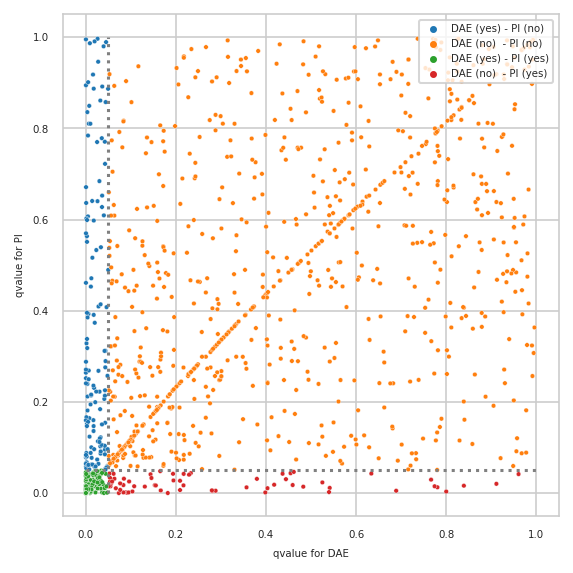

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_comparision_2_DAE


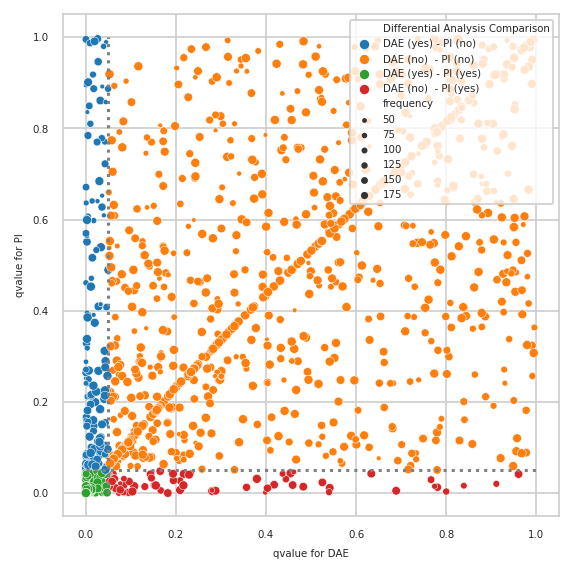

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
PSEN2,ENSP00000355747,5.000
MAPT,ENSP00000340820,4.800
...,...,...
LPIN3,ENSP00000487971,0.681
HECTD1,ENSP00000382269,0.681
ETNK1,ENSP00000500633,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/c643ee7f4c0bb0357e98a520d824c308_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out